In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# import data

df = pd.read_csv('/content/drive/MyDrive/DS Course Uploads/Datasets/car.csv')
df.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying_Price       1728 non-null   object
 1   Maintenance_Price  1728 non-null   object
 2   No_of_Doors        1728 non-null   object
 3   Person_Capacity    1728 non-null   object
 4   Size_of_Luggage    1728 non-null   object
 5   Safety             1728 non-null   object
 6   Car_Acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
df.isnull().sum()

,0
Buying_Price,0
Maintenance_Price,0
No_of_Doors,0
Person_Capacity,0
Size_of_Luggage,0
Safety,0
Car_Acceptability,0


In [5]:
df.duplicated().sum()

0

In [7]:
for col in df.columns:
  print(col, df[col].unique())

Buying_Price ['vhigh' 'high' 'med' 'low']
Maintenance_Price ['vhigh' 'high' 'med' 'low']
No_of_Doors ['2' '3' '4' '5more']
Person_Capacity ['2' '4' 'more']
Size_of_Luggage ['small' 'med' 'big']
Safety ['low' 'med' 'high']
Car_Acceptability ['unacc' 'acc' 'vgood' 'good']


In [15]:
# Separating input and output

X = df.drop('Car_Acceptability', axis=1)
y = df['Car_Acceptability']

In [16]:
# Label encode output

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
# one hot encode X

X = pd.get_dummies(X, drop_first=True, dtype=int)

In [18]:
for col in X.columns:
  print(col, X[col].unique())

print(set(y))

Buying_Price_low [0 1]
Buying_Price_med [0 1]
Buying_Price_vhigh [1 0]
Maintenance_Price_low [0 1]
Maintenance_Price_med [0 1]
Maintenance_Price_vhigh [1 0]
No_of_Doors_3 [0 1]
No_of_Doors_4 [0 1]
No_of_Doors_5more [0 1]
Person_Capacity_4 [0 1]
Person_Capacity_more [0 1]
Size_of_Luggage_med [0 1]
Size_of_Luggage_small [1 0]
Safety_low [1 0]
Safety_med [0 1]
{0, 1, 2, 3}


In [19]:
# Performing train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelling

In [31]:
# Fitting the data

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [32]:
# Evaluating the model

print("Accuracy = ", metrics.accuracy_score(y_test, y_pred).round(2))
print("Precision = ", metrics.precision_score(y_test, y_pred, average='weighted').round(2))
print("Recall = ", metrics.recall_score(y_test, y_pred, average='weighted').round(2))
print("F1 score = ", metrics.f1_score(y_test, y_pred, average='weighted').round(2))
print("ROC-AUC = ", metrics.roc_auc_score(y_test, lr.predict_proba(X_test), multi_class='ovr').round(2))

Accuracy =  0.9
Precision =  0.9
Recall =  0.9
F1 score =  0.9
ROC-AUC =  0.99


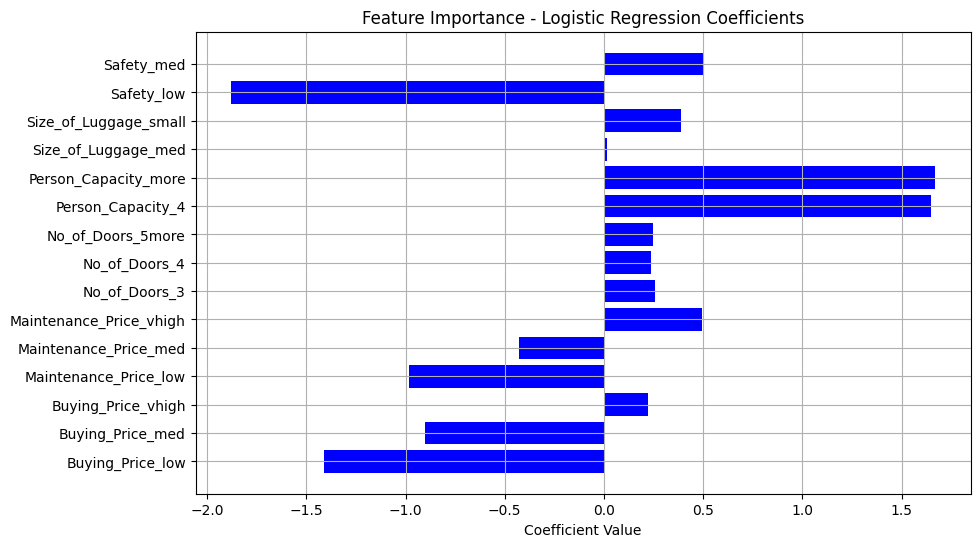

In [37]:
# Get the feature names and coefficients
feature_names = X.columns
coefficients = lr.coef_[0]

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients, color='b', align='center')
plt.yticks(range(len(coefficients)), feature_names)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance - Logistic Regression Coefficients')
plt.grid(True)
plt.show()

### Model Optimisation

In [47]:
# Perform k-Fold Cross-Validation
from sklearn.model_selection import cross_val_score, KFold

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr, X, y, cv=kf, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV Score: {np.std(cv_scores):.4f}")

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}

# Initialize the Grid Search with Cross-Validation
grid_search = GridSearchCV(lr, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X, y)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")


Cross-Validation Scores: [0.89884393 0.9132948  0.90462428 0.90144928 0.88695652]
Mean CV Score: 0.9010
Standard Deviation of CV Score: 0.0086


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'C': 100, 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.9288


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# Optimised model

lr_new = LogisticRegression(C=100)
lr_new.fit(X_train, y_train)
y_pred_new = lr_new.predict(X_test)

# Evaluating the model

print("Accuracy = ", metrics.accuracy_score(y_test, y_pred_new).round(2))
print("Precision = ", metrics.precision_score(y_test, y_pred_new, average='weighted').round(2))
print("Recall = ", metrics.recall_score(y_test, y_pred_new, average='weighted').round(2))
print("F1 score = ", metrics.f1_score(y_test, y_pred_new, average='weighted').round(2))
print("ROC-AUC = ", metrics.roc_auc_score(y_test, lr_new.predict_proba(X_test), multi_class='ovr').round(2))

Accuracy =  0.93
Precision =  0.94
Recall =  0.93
F1 score =  0.93
ROC-AUC =  0.99


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
